<a href="https://colab.research.google.com/github/astiwari733/Machine-learning-project/blob/main/clustering_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering


#Project - Segmenting customers into clusters

Perform Customer Segmentation on the transactional data to build an efficient marketing model. This is a transactional data set that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a registered non-store online retail.

Invoice No: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

Invoice Date: Invoice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [4]:
# Reading the dataset
data = pd.read_excel('/content/Project 6-Segmenting customers into clusters-Dataset.xlsx')

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data.shape

(541909, 8)

# Data preprocessing

checking missing values

In [7]:
# Percentage of missing values in each variable
data.isnull().sum()/len(data)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

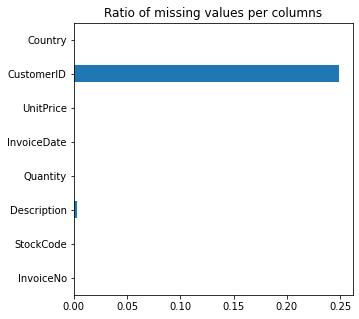

In [8]:
# Visualizing ratio of missing values
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
plt.show()

We can't keep the data without any value in the CustomerID column since we want to classify the customers. So we'll drop the lines with NaN values on the CustomerID column.

In [9]:
# Dropping the null values from CustomerID column
data = data.dropna(subset=["CustomerID"])

In [10]:
# percentage of missing values in each variable
data.isnull().sum()/len(data)*100

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

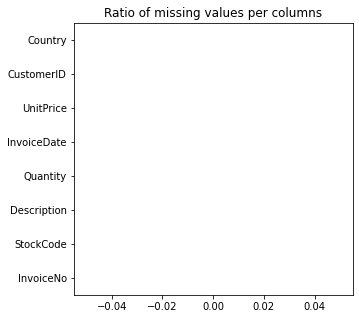

In [11]:
# Ratio of missing values

plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.barh()
plt.title("Ratio of missing values per columns")
plt.show()

As we can see after removing null values from the CustomerID variable, null values from the Description variable have also been removed.

# Checking data type of variables

In [12]:
# Checking the data types of each feaure
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
# Since our dataset is containing features `InvoiceNo` and `StockCode` having mixed values as int and str type, we will convert
# them to string.
data.InvoiceNo = data.InvoiceNo.astype(str)
data.StockCode = data.StockCode.astype(str)

In [14]:
# Extracting the Month, Weekday and Hour of the invoice
data['InvoiceDate_month'] = data['InvoiceDate'].dt.month
data['InvoiceDate_weekday'] = data['InvoiceDate'].dt.weekday
data['InvoiceDate_hour'] = data['InvoiceDate'].dt.hour

Since the InvoiceNo is containing cancelled orders also, we will check the amount of cancelled orders if it is significant or not.

In [15]:
# Constucting a groupby dataframe
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
number_of_products_per_group = temp.rename(columns = {'InvoiceDate':'Number of products'})

In [16]:
# Finding the cancelled orders and imputing 1 if it is cancelled otherwise 0.
number_of_products_per_group['order_cancelled'] = number_of_products_per_group['InvoiceNo'].apply(lambda x:int('C' in x))

# Percent cancelled orders.
len(number_of_products_per_group[number_of_products_per_group['order_cancelled']==1])/len(number_of_products_per_group)*100

16.466876971608833

In [17]:
# Applying lambda function over the whole dataset
data['order_cancelled'] = data['InvoiceNo'].apply(lambda x:int('C' in x))

In [18]:
# Looking at the cancelled order rows
data[data['order_cancelled']==1].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_month,InvoiceDate_weekday,InvoiceDate_hour,order_cancelled
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,12,2,9,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,2,9,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,2,10,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2,10,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2,10,1


In [19]:
# Checking the data type
data.dtypes

InvoiceNo                      object
StockCode                      object
Description                    object
Quantity                        int64
InvoiceDate            datetime64[ns]
UnitPrice                     float64
CustomerID                    float64
Country                        object
InvoiceDate_month               int64
InvoiceDate_weekday             int64
InvoiceDate_hour                int64
order_cancelled                 int64
dtype: object

In [20]:
# dropping the InvoiceDate column as we have extracted the datetime variables.
data = data.drop('InvoiceDate', axis = 1)

# Label encoding the string variables

In [21]:
# Importing Label Encoder for converting the categorical values to numeric value
from sklearn.preprocessing import LabelEncoder

In [22]:
# Transforming each feature
le = LabelEncoder()
label_InvoiceNo = le.fit_transform(data['InvoiceNo'])
label_StockCode = le.fit_transform(data['StockCode'])
label_Description = le.fit_transform(data['Description'])
label_Country = le.fit_transform(data['Country'])

In [23]:
# Storing the generated label in their respective columns
data['InvoiceNo'] = label_InvoiceNo
data['StockCode'] = label_StockCode
data['Description'] = label_Description
data['Country'] = label_Country

Scaling the data

In [24]:
# Importing Standard Scaler and fitting the scaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)

In [25]:
# Checking the scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05,4.068290e+05
mean,-5.365368e-17,-5.952205e-17,3.807455e-18,-4.523536e-18,5.868371e-18,-3.051553e-16,3.906659e-16,-2.235570e-18,-1.318986e-16,-1.933768e-16,2.333376e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.792216e+00,-1.863931e+00,-1.858922e+00,-3.257311e+02,-4.992379e-02,-1.716675e+00,-4.871627e+00,-1.932163e+00,-1.356156e+00,-2.948631e+00,-1.495949e-01
25%,-8.808803e-01,-7.538118e-01,-8.095044e-01,-4.045671e-02,-3.189019e-02,-7.788819e-01,3.223641e-01,-7.622096e-01,-8.358387e-01,-7.603986e-01,-1.495949e-01
50%,6.467571e-02,-6.072778e-02,-3.460664e-02,-2.839365e-02,-2.179138e-02,-7.918459e-02,3.223641e-01,1.152558e-01,-3.155215e-01,1.148945e-01,-1.495949e-01
75%,8.465154e-01,6.311714e-01,8.449574e-01,-2.465022e-04,4.176999e-03,8.772823e-01,3.223641e-01,9.927212e-01,7.251129e-01,5.525410e-01,-1.495949e-01
max,2.204154e+00,2.499536e+00,1.717176e+00,3.256341e+02,5.621654e+02,1.750299e+00,4.707639e-01,1.285210e+00,1.765747e+00,3.178420e+00,6.684718e+00


# Kmeans clustering

In [ ]:
# Appending the result of inertia in a blank list named SSE, after fitting the scaled data into kmeansfor each number
# of clusters.
SSE_scaled = []

for cluster in range(1,15):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

In [ ]:
# Creating a dataframe
frame_scaled = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE_scaled})

Elbow Curve for clusters

In [ ]:
# Plotting the Elbow curve
plt.figure(figsize=(12,6))
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("SSE")
plt.show()

From the above elbow curve, we can observe that the optimum value for number of clusters is 7.

In [ ]:
# Fitting the data and predicting the clusters
kmeans = KMeans(n_jobs = -1, n_clusters = 7)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)


# predicted clusters
pred

In [ ]:
# Creating a dataframe of scaled data
frame = pd.DataFrame(data_scaled)


# Inserting a column name cluster and putting the predicted values of clusters
frame['cluster'] = pred


# Number of data points allocated to each cluster
frame['cluster'].value_counts()

In [ ]:
# Checking the dataframe with clusters
frame.head()

# After we predicted the clusters for each of the data elements, above dataframe shows that out of the 7 clusters, which data item will belong to which cluster.*